In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset.isnull().values.any()

False

In [10]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
dataset = pd.get_dummies(data = dataset, drop_first=True)

In [16]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
dataset.shape

(1338, 9)

In [18]:
dataset_1 = dataset.drop(columns = 'charges')

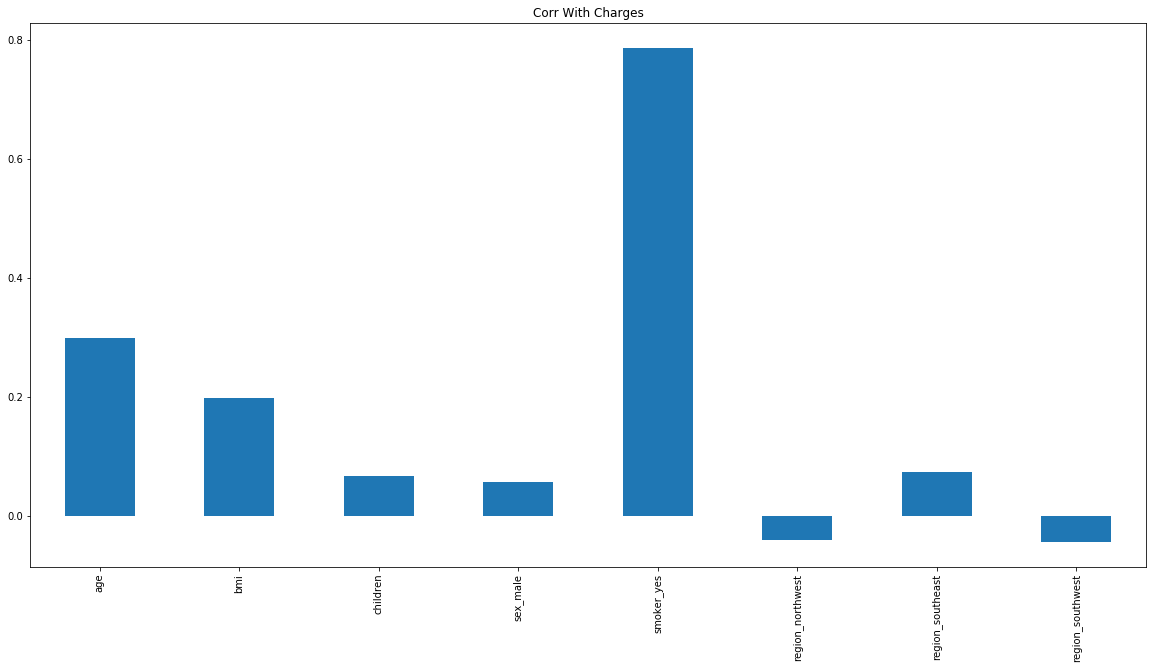

In [21]:
dataset_1.corrwith(dataset['charges']).plot.bar(
    figsize=(20,10), title = 'Corr With Charges'
)

In [22]:
corr = dataset.corr()

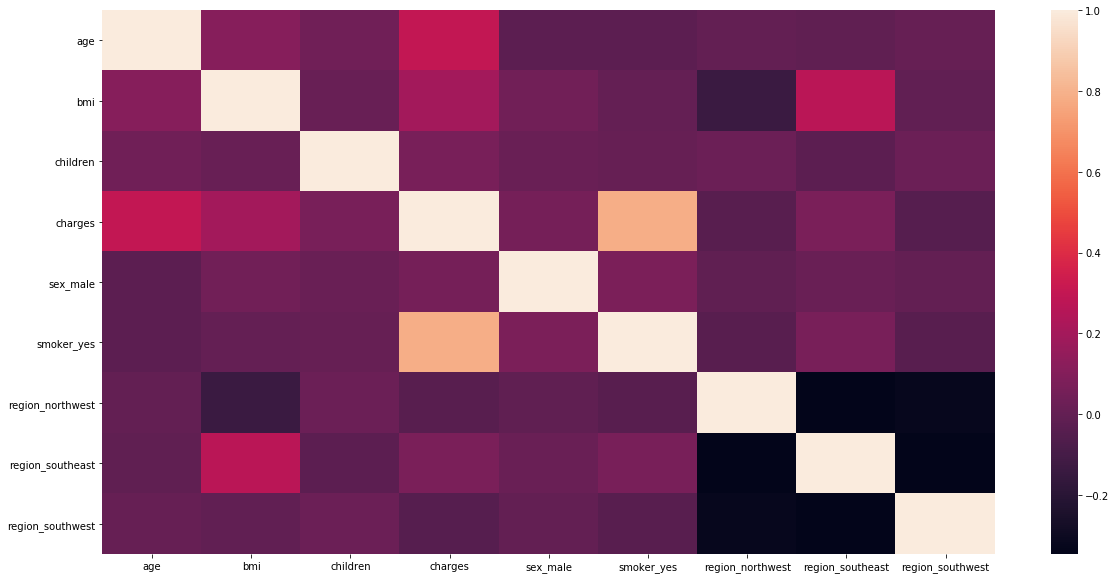

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(corr)

In [24]:
x = dataset.drop(columns='charges')
y = dataset['charges']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
# for linear regression
from sklearn.linear_model import LinearRegression
classifr_lr = LinearRegression()
classifr_lr.fit(x_train, y_train)
y_pred = classifr_lr.predict(x_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
results = pd.DataFrame([['Multiple Logistic Regression', r2]], columns = ['Model','R2'])

In [44]:
results

,Model,R2
0,Multiple Logistic Regression,0.795879


In [45]:
# for random forest Regression
from sklearn.ensemble import RandomForestRegressor
classifr_rf = RandomForestRegressor()
classifr_rf.fit(x_train, y_train)
y_pred = classifr_rf.predict(x_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
model_result = pd.DataFrame([['Random Forest Regressor', r2]], columns = ['Model','R2'])

In [46]:
results = results.append(model_result, ignore_index=True)

In [47]:
results

,Model,R2
0,Multiple Logistic Regression,0.795879
1,Random Forest Regressor,0.873329


In [48]:
# Predicting New Values Example 1
# Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast
obs_frank = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [53]:
classifr_lr.predict(sc.transform(obs_frank))

array([39070.42170156])

In [54]:
classifr_rf.predict(sc.transform(obs_frank))

array([45261.0414009])

In [55]:
# exmaple 2
# sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]
obs_sara = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [56]:
classifr_lr.predict(sc.transform(obs_sara))

array([2319.33260428])

In [57]:
classifr_rf.predict(sc.transform(obs_sara))

array([2095.8703265])